In [1]:
from sklearn import preprocessing
import pandas as pd 
from datetime import datetime
df = pd.read_hdf('../data/processed/train/aggr_train_zeros.hdf')

threshold = datetime(2015, 9, 1)

df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-1')

In [2]:


def X(df):
    df['day_of_year'] = df['date'].dt.dayofyear
    date_cols = [
        'month', 'year',
        'fridays', 'day_of_year', 'days_in_a_month'
    ]
    one_hot_cols = [
        'shop_id', 'mall', 'city',
        'item_id', 'item_category_id', 'first_big_category', 'last_big_category',
    ]
    additional = [
        'expected_sales'
    ]

    df_X = df[
        [
            col for col in df.columns
            if col.startswith('count')
        ]
        + date_cols + one_hot_cols + additional
        ]

    # df_X = pd.get_dummies(df_X, columns=one_hot_cols)
    # df_X = pd.get_dummies(df_X, columns=one_hot_cols + date_cols)
    for f in df_X.columns:
        if df_X[f].dtype == 'object':
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(df_X[f].values))
            df_X[f] = lbl.transform(list(df_X[f].values))
    return df_X

def XY(df):
    df_X = X(df)
    df_y = df['item_cnt_day']
    return df_X, df_y


In [3]:

df_train = df[df['date'] < threshold]

In [4]:


df_X_train, df_y_train = XY(df_train)

/home/piotrek/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/piotrek/.local/lib/python3.5/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=30, n_jobs=-1, max_depth=6)
model.fit(df_X_train, df_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
model.feature_importances_.sort()

In [9]:
model.feature_importances_

array([1.09061701e-02, 5.43060581e-03, 6.85420912e-04, 6.05921548e-04,
       1.02015909e-03, 7.97713964e-04, 6.66790733e-03, 4.21167197e-04,
       8.99308696e-04, 7.93740694e-04, 2.08669723e-03, 1.13477269e-03,
       2.25557398e-05, 6.32539114e-03, 4.05399577e-03, 3.41378916e-05,
       4.10879458e-05, 3.94938618e-05, 1.67880452e-03, 1.08433370e-04,
       8.66138706e-04, 1.17721895e-03, 1.51589972e-04, 5.11243001e-05,
       1.05025826e-03, 1.71582596e-03, 6.79581081e-04, 8.12275186e-04,
       1.17695509e-03, 9.85749095e-05, 2.46874478e-03, 2.04782375e-03,
       1.75422352e-04, 1.55916496e-03, 1.35751338e-03, 5.42959746e-03,
       2.75800500e-03, 7.15146961e-04, 1.00230517e-03, 6.25703919e-03,
       1.87154760e-03, 1.74974221e-03, 2.34234152e-01, 2.25277317e-01,
       5.32889673e-03, 9.21727147e-04, 5.43661495e-02, 1.99395527e-01,
       1.79037717e-03, 1.88584208e-03, 8.09431898e-04, 1.15580255e-03,
       2.21938343e-04, 2.55348761e-03, 9.68045898e-04, 2.64812005e-04,
      

In [11]:
feat_ = model.feature_importances_
feat_.sort()
feat_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.87335695e-06,
       1.03643496e-05, 1.67462680e-05, 2.25557398e-05, 2.41648597e-05,
       3.41378916e-05, 3.94938618e-05, 4.10879458e-05, 5.11243001e-05,
       9.85749095e-05, 1.08433370e-04, 1.19374680e-04, 1.24957361e-04,
       1.31774276e-04, 1.43102325e-04, 1.51589972e-04, 1.66506238e-04,
       1.75422352e-04, 1.88003254e-04, 1.89156820e-04, 1.96659888e-04,
       1.98929763e-04, 2.04048300e-04, 2.21938343e-04, 2.24132047e-04,
       2.34240054e-04, 2.64812005e-04, 2.85100148e-04, 2.89301407e-04,
       2.92201679e-04, 2.92412797e-04, 2.95874872e-04, 3.19262211e-04,
       3.30668195e-04, 3.37965690e-04, 3.45757343e-04, 3.47618647e-04,
       3.85910669e-04, 3.93626405e-04, 4.21167197e-04, 4.26042157e-04,
       4.72813408e-04, 4.82810562e-04, 4.86308725e-04, 4.89821736e-04,
       5.58770497e-04, 5.96975091e-04, 6.04789613e-04, 6.05921548e-04,
       6.39766146e-04, 6.51814904e-04, 6.79581081e-04, 6.84268403e-04,
      

In [16]:
import numpy as np 
feat = pd.DataFrame(np.vstack(zip(df_X_train.columns, model.feature_importances_)),columns=['feat', 'import'])
feat.head()

,feat,import
0,count_aggr_1_month_shop_id,0.010906170083130658
1,count_aggr_year_shop_id,0.005430605810376044
2,count_aggr_2_quartals_ago_shop_id,0.0006854209118008463
3,count_aggr_1_month_ago_shop_id,0.0006059215480858566
4,count_aggr_3_months_shop_id,0.0010201590938653268


In [27]:
feat = feat.sort_values(by='import', ascending=False)
feat.head()

,feat,import
42,count_aggr_1_month_shop_id_item_id,0.234234
43,count_aggr_year_shop_id_item_id,0.225277
47,count_aggr_6_months_shop_id_item_id,0.199396
46,count_aggr_3_months_shop_id_item_id,0.054366
133,month,0.020005


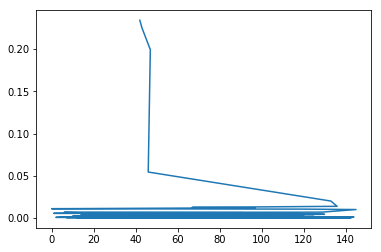

In [28]:
feat['import'] = feat['import'].astype(float)
feat['import'].plot()
plt.show()

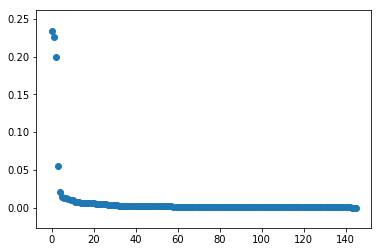

In [31]:
plt.scatter(feat.reset_index()['import'].index, feat['import'].values)
plt.show()

In [20]:
import matplotlib.pyplot as plt
plt.show()

In [29]:
feat.head()

,feat,import
42,count_aggr_1_month_shop_id_item_id,0.234234
43,count_aggr_year_shop_id_item_id,0.225277
47,count_aggr_6_months_shop_id_item_id,0.199396
46,count_aggr_3_months_shop_id_item_id,0.054366
133,month,0.020005


In [32]:
feat.head(20)

,feat,import
42,count_aggr_1_month_shop_id_item_id,0.234234
43,count_aggr_year_shop_id_item_id,0.225277
47,count_aggr_6_months_shop_id_item_id,0.199396
46,count_aggr_3_months_shop_id_item_id,0.054366
133,month,0.020005
136,day_of_year,0.013745
67,count_aggr_year_mall_item_id,0.012464
97,count_aggr_year_city_item_category_id,0.012013
0,count_aggr_1_month_shop_id,0.010906
121,count_last_week_shop_id_item_id,0.010406


In [33]:
feat.to_csv('../reports/feature_importances.csv', index=False)